# Admission Data Visualizations for Ministry of Education

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Load the single sheet directly (no need for sheet_name=None)
df = pd.read_excel("Cleaned_Admission_List.xlsx")

# Now you can inspect it
df.head(7)



,no,formid,index_no,name,ge,uace_,dcode,dname,course_code,course_name,tot_wt,program_name
0,1,25APF900350094290048,U2789/905,NIMUSIIMA SANDRAH,F,2024,55.0,WAKISO,ACC,BSC. Accounting (EVE),42.7,BSC. Accounting (EVE)
1,2,25APF561140686250786,U0025/529,BULUKUKU DANIEL EPHRAIM,M,2014,93.0,KIBUKU,ACC,BSC. Accounting (EVE),42.3,BSC. Accounting (EVE)
2,3,25APF530278631275455,U2977/518,MIREMBE ELIZABETH,F,2024,16.0,KAMPALA,ACC,BSC. Accounting (EVE),41.1,BSC. Accounting (EVE)
3,4,25APF1346250173272930,U1664/712,NAMATA MARTHA,F,2024,33.0,MASAKA,ACC,BSC. Accounting (EVE),40.7,BSC. Accounting (EVE)
4,5,25APF1553620758303031,U0004/754,NAKALEMA JOYCE,F,2024,33.0,MASAKA,ACC,BSC. Accounting (EVE),40.3,BSC. Accounting (EVE)
5,6,25APF1537469809268568,U2000/501,AGABA MARVIN,M,2024,46.0,NTUNGAMO,ACC,BSC. Accounting (EVE),39.9,BSC. Accounting (EVE)
6,7,25APF10681047294195,U1664/585,EDENI PRISCILLA,F,2024,3.0,ARUA,ACC,BSC. Accounting (EVE),39.8,BSC. Accounting (EVE)


In [2]:
# Step 1: Identify all program sections in the sheet
# We'll detect rows where only one non-null cell exists and contains a program name
program_rows = df[df.notna().sum(axis=1) == 1]

In [3]:
# Preview detected program titles
program_titles = program_rows.iloc[:, 0].reset_index()
program_titles.columns = ['row_index', 'program_title']
program_titles.head(30)

,row_index,program_title


In [4]:
import pandas as pd

# Load the Excel sheet
df_raw = pd.read_excel("Admission.xlsx")

# Step 1: Identify program titles (rows with only 1 non-null cell)
program_rows = df_raw[df_raw.notna().sum(axis=1) == 1]
program_titles = pd.DataFrame({
    'row_index': program_rows.index,
    'program_title': program_rows.iloc[:, 0].astype(str)  # Ensure strings
})

# Step 2: Append 'END' marker to simplify loop range
program_titles = pd.concat([
    program_titles,
    pd.DataFrame([{'row_index': len(df_raw), 'program_title': 'END'}])
], ignore_index=True)

# Step 3: Process each block of data
cleaned_tables = []

for i in range(len(program_titles) - 1):
    start_idx = program_titles.loc[i, 'row_index']
    end_idx = program_titles.loc[i + 1, 'row_index']
    program_name = program_titles.loc[i, 'program_title']
    
    # Skip irrelevant sections
    if any(keyword in program_name.upper() for keyword in [
        "ACADEMIC REGISTRAR", "ADMISSION LISTS", "PRIVATE SPONSORSHIP", "END"
    ]):
        continue

    # Extract block and clean headers
    data_block = df_raw.iloc[start_idx+2:end_idx].copy()
    data_block.columns = df_raw.iloc[start_idx+1].astype(str).str.strip().str.lower()
    
    # Debug print to inspect structure
    print(f"\nProcessing program: {program_name}")
    print("Columns:", list(data_block.columns))
    
    # Add program name column
    data_block['program_name'] = program_name

    # Only keep if required columns are present
    required_cols = {'index no', 'name'}
    if required_cols.issubset(data_block.columns):
        data_block = data_block[data_block['index no'].notna() & data_block['name'].notna()]
        cleaned_tables.append(data_block)
    else:
        print(f"Skipped '{program_name}' — Missing required columns.")

# Step 4: Combine all cleaned tables
if cleaned_tables:
    df_cleaned = pd.concat(cleaned_tables, ignore_index=True)
    print("\nPreview of cleaned data:")
    print(df_cleaned.head(5))

    print("\n✅ Cleaned data saved to 'cleaned_admission_data.xlsx'")
else:
    print("\n⚠️ No valid data blocks found to clean.")


Processing program: BSC. Accounting (EVE)
Columns: ['no', 'formid', 'index_no', 'name', 'ge', 'uace_', 'dcode', 'dname', 'course_code', 'course_name', 'tot_wt']
Skipped 'BSC. Accounting (EVE)' — Missing required columns.

Processing program: B.Business Administration-Mak(Afternoon)
Columns: ['no', 'formid', 'index_no', 'name', 'ge', 'uace_', 'dcode', 'dname', 'course_code', 'course_name', 'tot_wt']
Skipped 'B.Business Administration-Mak(Afternoon)' — Missing required columns.

Processing program: B.Business Administration(Jinja-Mak)Day
Columns: ['no', 'formid', 'index_no', 'name', 'ge', 'uace_', 'dcode', 'dname', 'course_code', 'course_name', 'tot_wt']
Skipped 'B.Business Administration(Jinja-Mak)Day' — Missing required columns.

Processing program: Bachelor of Business Administration-MAK(Day)
Columns: ['no', 'formid', 'index_no', 'name', 'ge', 'uace_', 'dcode', 'dname', 'course_code', 'course_name', 'tot_wt']
Skipped 'Bachelor of Business Administration-MAK(Day)' — Missing required c

In [5]:

# Strip column names and whitespace in string fields
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df['dname'] = df['dname'].str.strip().str.upper()
df['name'] = df['name'].str.strip().str.title()
df['ge'] = df['ge'].str.upper()
df.head()


,no,formid,index_no,name,ge,uace_,dcode,dname,course_code,course_name,tot_wt,program_name
0,1,25APF900350094290048,U2789/905,Nimusiima Sandrah,F,2024,55.0,WAKISO,ACC,BSC. Accounting (EVE),42.7,BSC. Accounting (EVE)
1,2,25APF561140686250786,U0025/529,Bulukuku Daniel Ephraim,M,2014,93.0,KIBUKU,ACC,BSC. Accounting (EVE),42.3,BSC. Accounting (EVE)
2,3,25APF530278631275455,U2977/518,Mirembe Elizabeth,F,2024,16.0,KAMPALA,ACC,BSC. Accounting (EVE),41.1,BSC. Accounting (EVE)
3,4,25APF1346250173272930,U1664/712,Namata Martha,F,2024,33.0,MASAKA,ACC,BSC. Accounting (EVE),40.7,BSC. Accounting (EVE)
4,5,25APF1553620758303031,U0004/754,Nakalema Joyce,F,2024,33.0,MASAKA,ACC,BSC. Accounting (EVE),40.3,BSC. Accounting (EVE)


In [6]:
cluster_map = {
    "CITY": [
        "KAMPALA", "MBARARA", "JINJA", "GULU", "ARUA", 
        "LIRA", "MASAKA", "MBALE", "WAKISO", "HOIMA"
    ],
    "SEMI-URBAN": [
        "BUSHENYI", "IBANDA", "IGANGA", "KASESE", "KIBOGA",
        "KYOTERA", "KIRYANDONGO", "KITGUM", "KAMULI",
        "KAMWENGE", "KAYUNGA", "MASINDI", "MPIGI", "MUKONO",
        "MITYANA", "NEBBI", "NTUNGAMO", "PALLISA", "RUKUNGIRI",
        "SOROTI", "TORORO", "BUSIA", "KASSANDA", "KABAROLE"
    ],
    "RURAL-AGRICULTURAL": [
        "ADJUMANI", "AGAGO", "ALEBTONG", "AMOLATAR", "AMURIA",
        "AMURU", "APAC", "BUDAKA", "BUDUDA", "BUGIRI", "BUGWERI",
        "BUHWEJU", "BUIKWE", "BUKEDEA", "BUKOMANSIMBI", "BULAMBULI",
        "BULIISA", "BUNDIBUGYO", "BUNYANGABU", "BUTALEJA",
        "BUTAMBALA", "BUTEMBO", "BUYENDE", "DOKOLO", "GOMBA",
        "ISINGIRO", "KABERAMAIDO", "KALIRO", "KALUNGU",
        "KANUNGU", "KATAKWI", "KAZO", "KIBAALE", "KIBUKU",
        "KIKUUBE", "KIRUHURA", "KISORO", "KOBOKO", "KOLE",
        "KUMI", "KYANKWANZI", "KYEGEGWA", "KYENJOJO", "LAMWO",
        "LUUKA", "LUWEERO", "LWENGO", "MANAFWA", "MARACHA",
        "MAYUGE", "MITOOMA", "MOROTO", "MOYO", "MUBENDE",
        "NAKASEKE", "NAKASONGOLA", "NAMAYINGO", "NAMISINDWA",
        "NAMUTUMBA", "NGORA", "OBONGI", "OMORO", "OTUKE",
        "OYAM", "PAKWACH", "RAKAI", "RUBANDA", "RUBIRIZI",
        "RUKIGA", "SEMBABULE", "SERERE", "SHEEMA", "SIRONKO",
        "YUMBE", "ZOMBO", 
        "BUTEBO", "KABALE", "KAGADI", "KAKUMILO", "KAKUMIRO", 
        "KAPCHORWA", "KWANIA", "LYANTONDE", "MADI OKOLLO", 
        "NWOYA", "PADER", "KAPELEBYONG"
    ],
    "REMOTE-UNDERDEVELOPED": [
        "ABIM", "AMUDAT", "BUVUMA", "BUKWO", "KAABONG", "KAPELABYONG",
        "KALANGALA", "KOTIDO", "KWEEN", "MADIOKOLLO", "NAPAK",
        "NAKAPIRIPIRIT", "NABILATUK", "NTOROKO", "TEREGO", 
        "KARENGA", "NON UGANDAN"
    ]
}


region_map = {
    "CENTRAL": [
        "BUIKWE", "BUKOMANSIMBI", "BUTAMBALA", "BUVUMA", "GOMBA", 
        "KALANGALA", "KALUNGU", "KAMPALA", "KAYUNGA", "KIBOGA", 
        "KYANKWANZI", "LUWEERO", "LWENGO", "LYANTONDE", "MASAKA", 
        "MITYANA", "MPIGI", "MUBENDE", "MUKONO", "NAKASEKE", 
        "NAKASONGOLA", "RAKAI", "SEMBABULE", "WAKISO", "KYOTERA", 
        "KASSANDA"
    ],
    "EASTERN": [
        "AMURIA", "BUDAKA", "BUDUDA", "BUGIRI", "BUKEDEA", 
        "BULAMBULI", "BUSIA", "BUTALEJA", "BUTEBO", "BUYENDE", 
        "IGANGA", "JINJA", "KALIRO", "KAMULI", "KAPCHORWA", 
        "KATAKWI", "KUMI", "KABERAMAIDO", "MANAFWA", "MAYUGE", 
        "MBALE", "NAMAYINGO", "NAMUTUMBA", "NGORA", "PALLISA", 
        "SERERE", "SIRONKO", "SOROTI", "TORORO", "NAMISINDWA", 
        "BUKWO", "KIBUKU", "LUUKA", "KAPELEBYONG"
    ],
    "NORTHERN": [
        "ABIM", "ADJUMANI", "AGAGO", "ALEBTONG", "AMOLATAR", 
        "AMUDAT", "AMURU", "APAC", "ARUA", "DOKOLO", "GULU", 
        "KAABONG", "KITGUM", "KOBOKO", "KOLE", "KOTIDO", 
        "KWANIA", "KWEEN", "LIRA", "MADI OKOLLO", "MARACHA", 
        "MOROTO", "MOYO", "NABILATUK", "NAKAPIRIPIRIT", "NAPAK", 
        "NEBBI", "NWOYA", "NTOROKO", "OBONGI", "OMORO", 
        "OTUKE", "OYAM", "PADER", "PAKWACH", "YUMBE", "ZOMBO"
    ],
    "WESTERN": [
        "BUHWEJU", "BULIISA", "BUNDIBUGYO", "BUNYANGABU", "BUSHENYI", 
        "HOIMA", "IBANDA", "ISINGIRO", "KABALE", "KABAROLE", 
        "KAGADI", "KAKUMIRO", "KAKUMILO", "KAMWENGE", "KANUNGU", 
        "KASESE", "KIBAALE", "KIRUHURA", "KIRYANDONGO", "KISORO", 
        "KYEGEGWA", "KYENJOJO", "LAMWO", "MASINDI", "MBARARA", 
        "MITOOMA", "NTUNGAMO", "RUBANDA", "RUBIRIZI", "RUKIGA", 
        "RUKUNGIRI", "SHEEMA", 'KIKUUBE'
    ]
}

sub_region_map = {
    "BUGANDA": [
        "BUIKWE", "BUKOMANSIMBI", "BUTAMBALA", "BUVUMA", "GOMBA",
        "KALANGALA", "KALUNGU", "KAMPALA", "KAYUNGA", "KIBOGA",
        "KYANKWANZI", "LUWEERO", "LWENGO", "LYANTONDE", "MASAKA",
        "MITYANA", "MPIGI", "MUBENDE", "MUKONO", "NAKASEKE",
        "NAKASONGOLA", "RAKAI", "SEMBABULE", "WAKISO", "KYOTERA",
        "KASSANDA"
    ],
    "BUSOGA": [
        "JINJA", "IGANGA", "KAMULI", "LUUKA", "MAYUGE",
        "BUGIRI", "KALIRO", "BUYENDE", "NAMUTUMBA",
        "BUTALEJA", "BUGWERI"
    ],
    "BUGISU": [
        "MBALE", "MANAFWA", "SIRONKO", "BUDUDA", "NAMISINDA", "BULAMBULI" 
    ],
    "BUKEDI": [
        "TORORO", "BUTALEJA", "BUDAKA", "PALLISA", "KIBUKU", "BUTEBO", "BUSIA"
    ],
    "TESO": [
        "SOROTI", "KATAKWI", "KABERAMAIDO", "SERERE", "AMURIA",
        "KUMI", "NGORA", "BUKEDEA", "KAPELEBYONG"
    ],
    "SEBEI": [
        "KAPCHORWA", "KWEEN", "BUKWO"
    ],
    "LANGO": [
        "LIRA", "APAC", "DOKOLO", "KOLE", "OTUKE", "OYAM", "ALEBTONG", "AMOLATAR", "KWANIA"
    ],
    "ACHOLI": [
        "GULU", "AMURU", "NWOYA", "OMORO", "KITGUM", "PADER", "AGAGO", "LAMWO"
    ],
    "WEST NILE": [
        "ARUA", "KOLOBOKO", "YUMBE", "MOYO", "MARACHA", "NEBBI",
        "ZOMBO", "ADJUMANI", "OBONGI", "PAKWACH", "TEREGO",
        "MADI-OKOLLO"  
    ],
    "KARAMOJA": [
        "MOROTO", "KOTIDO", "ABIM", "KAABONG", "NAKAPIRIPIRIT",
        "NAPAK", "AMUDAT", "NABILATUK", "KARENGA"
    ],
    "ANKOLE": [
        "MBARARA", "NTUNGAMO", "BUSHENYI", "IBANDA", "SHEEMA",
        "KIRUHURA", "ISINGIRO", "BUHWEJU", "RWAMPARA", "MITOOMA",
        "RUBIRIZI" 
    ],
    "KIGEZI": [
        "KABALE", "KISORO", "KANUNGU", "RUBANDA", "RUKIGA",   # Added here
    ],
    "TOORO": [
        "KABAROLE", "KYENJOJO", "KAMWENGE", "KYEGEGWA", "BUNYANGABU",
        "BUNDIBUGYO", "KASESE"
    ],
    "BUNYORO": [
        "HOIMA", "MASINDI", "KIRYANDONGO", "KIKUUBE", "KAGADI", "BULIISA",
        "KAKUMIRO", "NTOROKO"
    ]
}




def classify_cluster(district):
    for cluster, districts in cluster_map.items():
        if district in districts:
            return cluster
    return "OTHER"

def classify_region(district):
    for region, districts in region_map.items():
        if district in districts:
            return region
    return "NON UGANDAN"

def classify_sub_region(district):
    for sub_region, districts in sub_region_map.items():
        if district in districts:
            return sub_region
    return "NON UGANDAN"


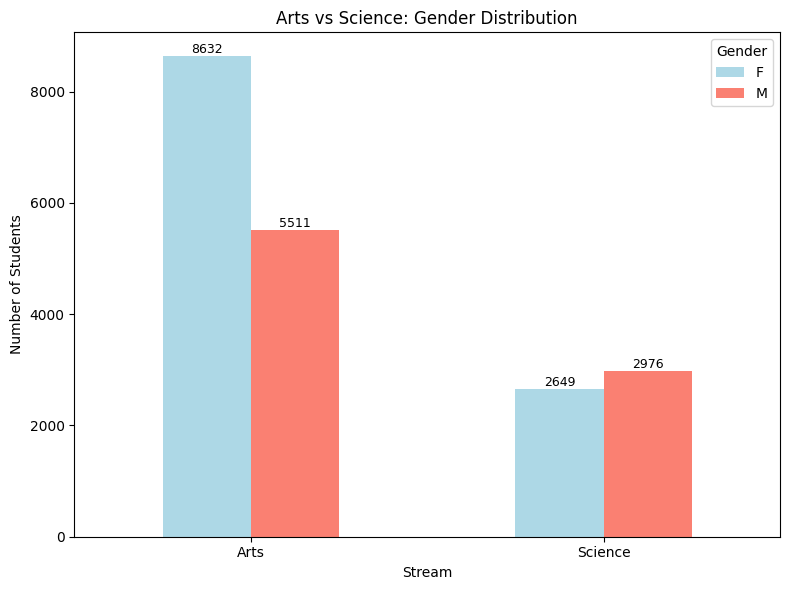

In [7]:
import matplotlib.pyplot as plt

# Define course to stream mapping
science_courses = [
    "BDS", "BDT", "BEH", "BLT", "BMR", "BOS", "BPT", "BYT", "MAM", "MLT", "NUR", "PHA", "BSL", "SSM",
    "BEC", "BYW", "EDA", "EDB", "EDP", "EEC", "SPS",
    "BJA", "BLB", "SCB", "SCP", "SCX", "VET",
    "BPS", "BST", "BUS", "SAS", "STA",
    "BBI", "BBP", "BBT", "BCB", "BIC",
    "BIA", "BSI", "BSJ", "BSW", "CSC", "CSE", "CSJ", "IST", "JCA", "SSE",
    "AGE", "AGM", "AGR", "BAI", "BEV", "BFS", "BGS", "BHD", "BIX", "BOF", "BUP", "BWE", "FST",
    "ARC", "BFA", "BID", "BVC", "BVL", "CCE", "CIV", "ELE", "LSG", "MEC", "BPG", "SQS"
]

arts_courses = [
    "ACC", "ADA", "ADJ", "ADM", "AML", "BBA", "BBC", "BBD", "BBE", "BBJ", "BHE", "BHJ", "BHM",
    "BIB", "BIM", "BJB", "BJJ", "BJO", "BJS", "BKE", "BLC", "BLM", "BMA", "BML", "BMM", "BMS",
    "BNE", "BNM", "BOM", "BPL", "BQE", "BRJ", "BRM", "BRO", "BSA", "BSF", "BSU", "BTB", "BTH",
    "BTT", "CEA", "CMM", "COB", "COE", "COM", "CRJ", "CRO", "ECE", "ECN", "ECO", "HMA", "HML",
    "HNM", "HOM", "HSJ", "HSO", "JAA", "JBE", "JOA", "MTM", "PMA", "PML", "PMM", "PNM", "PSC",
    "PSM", "PSU", "SEC", "TLM", "TTM",
    "APS", "APY", "ARS", "ASE", "ASS", "BAC", "BAP", "BCE", "BEN", "BEY", "BJC", "BJE", "BLE",
    "BLG", "DPA", "LGM", "LIS", "MUS"
]

# Create a mapping
df['stream'] = df['course_code'].apply(
    lambda x: 'Science' if x in science_courses else 'Arts' if x in arts_courses else None
)

# Drop unmatched
df = df.dropna(subset=['stream', 'ge'])

# Group by stream and gender
grouped = df.groupby(['stream', 'ge']).size().unstack(fill_value=0)

# Bar plot
ax = grouped.plot(kind='bar', color=['lightblue', 'salmon'], figsize=(8,6))
plt.title('Arts vs Science: Gender Distribution')
plt.ylabel('Number of Students')
plt.xlabel('Stream')
plt.xticks(rotation=0)
plt.legend(title='Gender')

# Add number labels
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(str(height), (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [8]:
# Apply mappings
df['cluster'] = df['dname'].apply(classify_cluster)
df['region'] = df['dname'].apply(classify_region)
df['sub_region'] = df['dname'].apply(classify_sub_region)

df[['dname', 'cluster', 'region', 'sub_region']].drop_duplicates().head(10)

,dname,cluster,region,sub_region
0,WAKISO,CITY,CENTRAL,BUGANDA
1,KIBUKU,RURAL-AGRICULTURAL,EASTERN,BUKEDI
2,KAMPALA,CITY,CENTRAL,BUGANDA
3,MASAKA,CITY,CENTRAL,BUGANDA
5,NTUNGAMO,SEMI-URBAN,WESTERN,ANKOLE
6,ARUA,CITY,NORTHERN,WEST NILE
7,IGANGA,SEMI-URBAN,EASTERN,BUSOGA
8,LUWEERO,RURAL-AGRICULTURAL,CENTRAL,BUGANDA
9,KASESE,SEMI-URBAN,WESTERN,TOORO
10,LWENGO,RURAL-AGRICULTURAL,CENTRAL,BUGANDA


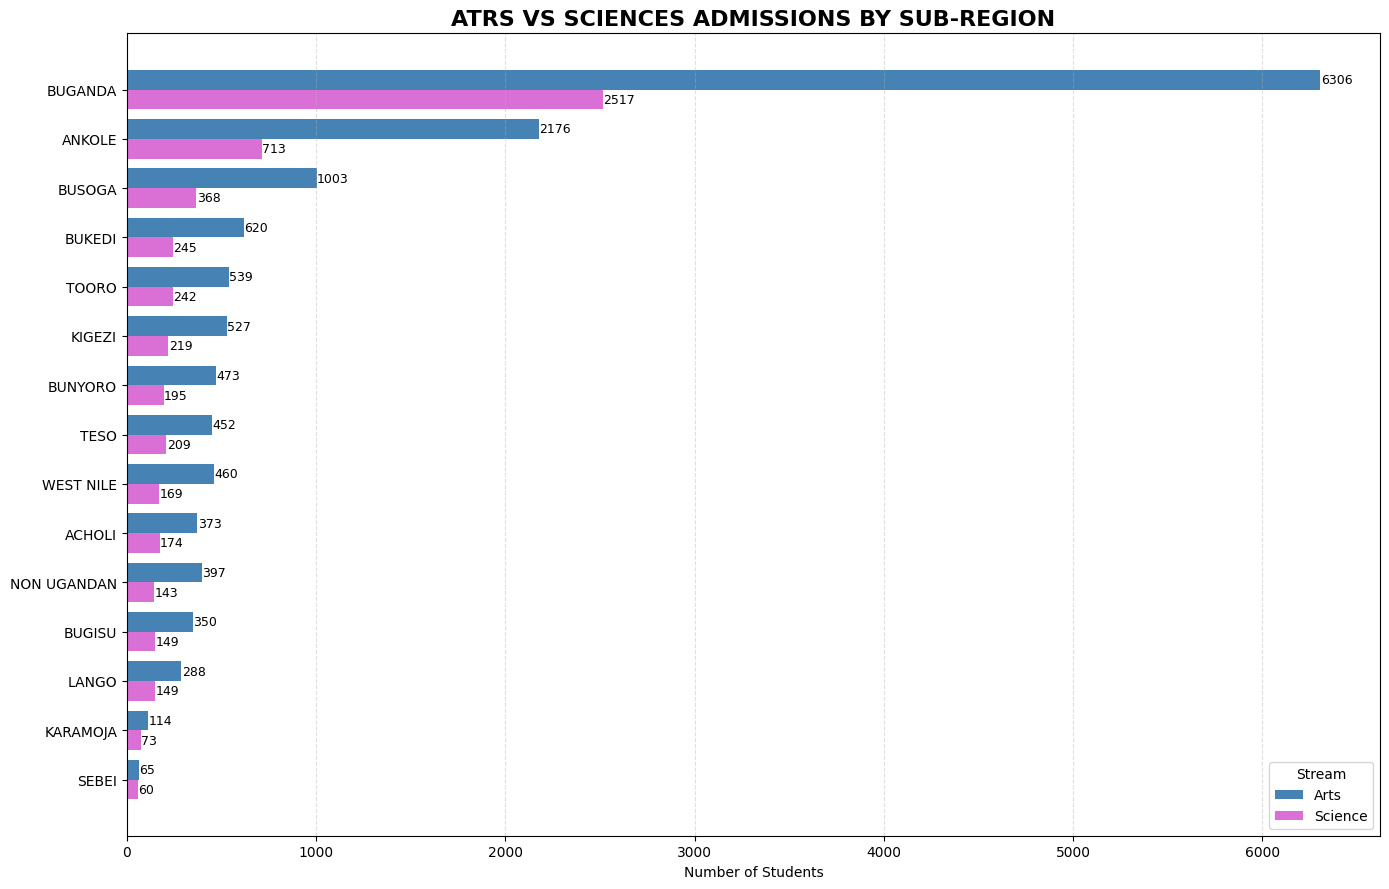

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by sub_region and stream
sub_region_stream_counts = df.groupby(['sub_region', 'stream']).size().unstack(fill_value=0)

# Sort by total admissions for clear visualization
sub_region_stream_counts['Total'] = sub_region_stream_counts.sum(axis=1)
sub_region_stream_counts = sub_region_stream_counts.sort_values(by='Total', ascending=False)
sub_region_stream_counts.drop(columns='Total', inplace=True)

# Plot settings
plt.figure(figsize=(14, 9))
colors = ['#4682B4', '#DA70D6']  # Science = blue, Arts = purple

# Plot grouped horizontal bars
bar_width = 0.4
y_pos = range(len(sub_region_stream_counts))

for i, stream in enumerate(sub_region_stream_counts.columns):
    plt.barh(
        [y + i * bar_width for y in y_pos],
        sub_region_stream_counts[stream],
        height=bar_width,
        label=stream,
        color=colors[i]
    )

    # Add value labels
    for y, val in zip(y_pos, sub_region_stream_counts[stream]):
        plt.text(val + 2, y + i * bar_width, str(val), va='center', fontsize=9)

# Y-axis labels
plt.yticks([y + bar_width / 2 for y in y_pos], sub_region_stream_counts.index)
plt.xlabel("Number of Students")
plt.title("ATRS VS SCIENCES ADMISSIONS BY SUB-REGION", fontsize=16, weight='bold')
plt.legend(title="Stream")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('visuals/arts_science_by_subregion.png', dpi=300, bbox_inches='tight')
plt.show()


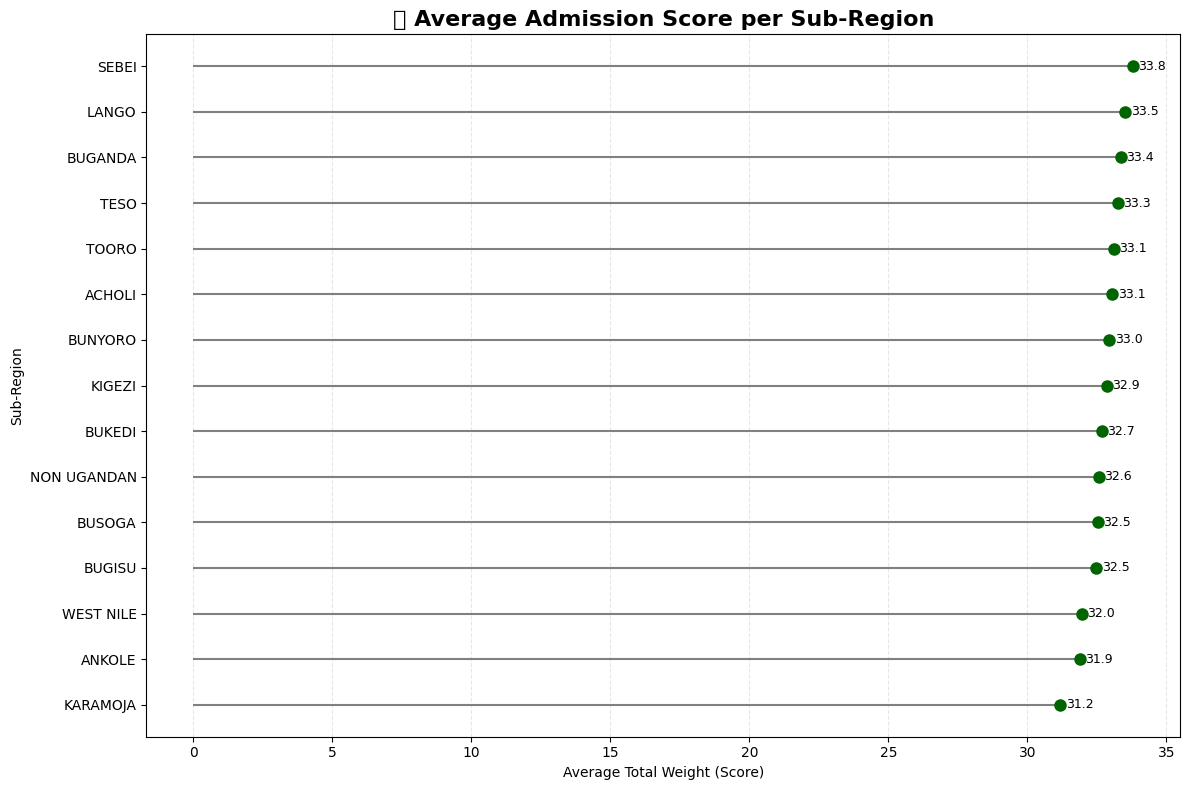

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Group and calculate average total weight
avg_scores = df.groupby('sub_region')['tot_wt'].mean().sort_values(ascending=True)

# Plot settings
plt.figure(figsize=(12, 8))
plt.hlines(y=avg_scores.index, xmin=0, xmax=avg_scores.values, color='gray', linewidth=1.5)
plt.plot(avg_scores.values, avg_scores.index, 'o', markersize=8, color='darkgreen')

# Add labels to dots
for i, value in enumerate(avg_scores.values):
    plt.text(value + 0.2, i, f"{value:.1f}", va='center', fontsize=9)

# Titles and labels
plt.title("📈 Average Admission Score per Sub-Region", fontsize=16, weight='bold')
plt.xlabel("Average Total Weight (Score)")
plt.ylabel("Sub-Region")
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()

# Save and show
plt.savefig('visuals/average_score_subregion.png', dpi=300, bbox_inches='tight')
plt.show()


In [11]:
# Convert all strings to uppercase for consistency
df['dname'] = df['dname'].str.upper()
df['region'] = df['region'].str.upper()
df['cluster'] = df['cluster'].str.upper()
df['ge'] = df['ge'].str.upper()


In [12]:
# Check if any 'NON UGANDAN' or 'OTHER' values remain
df[df['region'].str.upper() == 'NON UGANDAN']
df[df['cluster'].str.upper() == 'OTHER']

,no,formid,index_no,name,ge,uace_,dcode,dname,course_code,course_name,tot_wt,program_name,stream,cluster,region,sub_region
10379,42,25APF1096305957317713,ZZVX90YU,Namuyanja Masituula,F,2024,32.0,LUWERO,BSA,BSC. Accounting,39.2,BSC. Accounting(Day),Arts,OTHER,NON UGANDAN,NON UGANDAN


In [13]:
# Forcefully assign correct cluster and region for all records with dcode = 32 (LUWEERO)
df.loc[df['dcode'] == 32, ['cluster', 'region']] = ['RURAL-AGRICULTURAL', 'CENTRAL']

In [14]:
# Check if any 'NON UGANDAN' or 'OTHER' values remain
df[df['region'].str.upper() == 'NON UGANDAN']
df[df['cluster'].str.upper() == 'OTHER']

,no,formid,index_no,name,ge,uace_,dcode,dname,course_code,course_name,tot_wt,program_name,stream,cluster,region,sub_region


In [15]:
# Step 1: Normalize all district names
df['dname'] = df['dname'].astype(str).str.strip().str.upper()

# Step 2: Replace common typos or variations
corrections = {
    "LUWERO": "LUWEERO",
}

df['dname'] = df['dname'].replace(corrections)

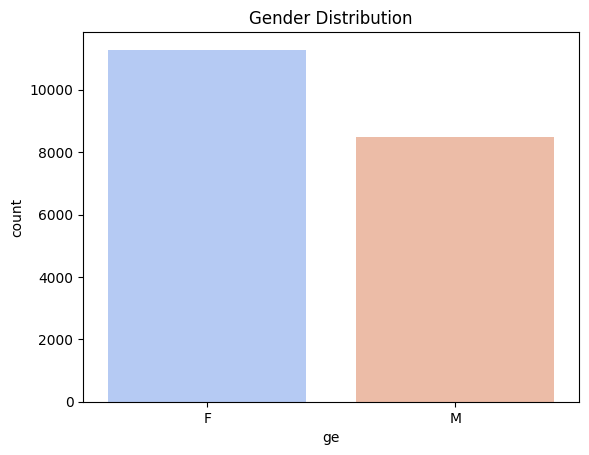

In [16]:
# Visualization 1: ge Distribution
sns.countplot(data=df, x='ge', palette='coolwarm')
plt.title('Gender Distribution')
plt.show()

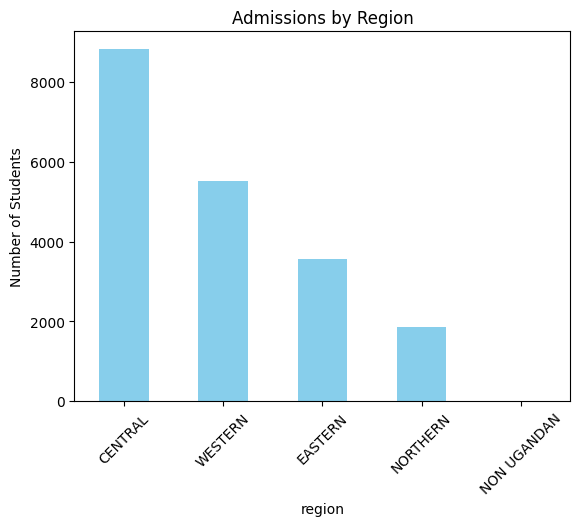

In [17]:
# Visualization 2: Admissions by Region
df['region'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Admissions by Region')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.show()

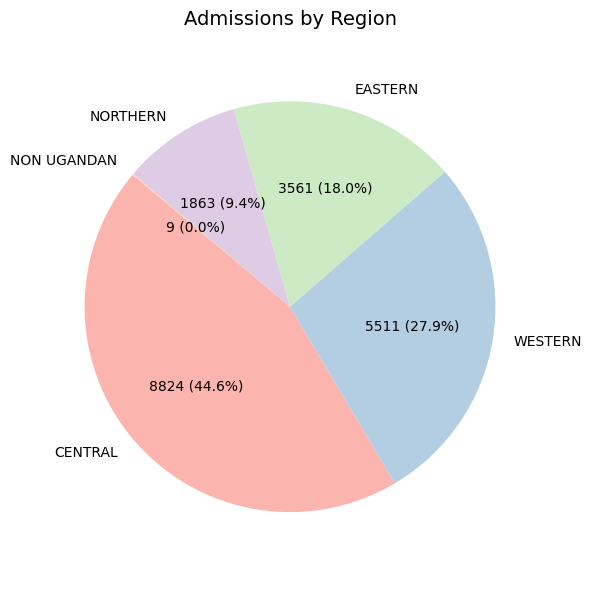

In [18]:
import matplotlib.pyplot as plt

# Count students per region
region_counts = df['region'].value_counts()

# Function to format the labels with both count and percentage
def autopct_format(pct):
    total = sum(region_counts)
    count = int(round(pct * total / 100))
    return f'{count} ({pct:.1f}%)'  # e.g., "1234 (12.3%)"

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    region_counts,
    labels=region_counts.index,
    autopct=autopct_format,  # Custom format function
    startangle=140,
    colors=plt.cm.Pastel1.colors
)

plt.title('Admissions by Region', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.tight_layout()
plt.savefig('admissions_by_region.png', dpi=300, bbox_inches='tight')
plt.show()


<Figure size 1000x600 with 0 Axes>

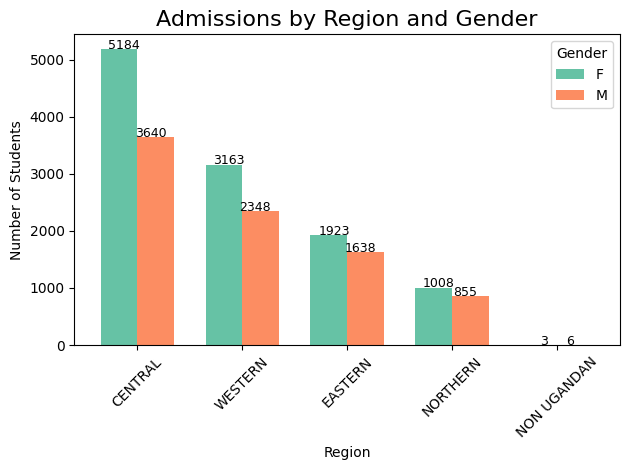

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Group data by region and gender
region_gender_counts = df.groupby(['region', 'ge']).size().unstack(fill_value=0)

# Sort by total admissions
region_gender_counts['Total'] = region_gender_counts.sum(axis=1)
region_gender_counts = region_gender_counts.sort_values(by='Total', ascending=False)
region_gender_counts.drop(columns='Total', inplace=True)

# Plot settings
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Set2")  # Clean and distinct color palette

# Create grouped bar chart
region_gender_counts.plot(kind='bar', color=colors, width=0.7)

# Annotate each bar with the count
for i, region in enumerate(region_gender_counts.index):
    for j, gender in enumerate(region_gender_counts.columns):
        count = region_gender_counts.loc[region, gender]
        plt.text(i + j*0.25 - 0.125, count + 1, str(count), ha='center', fontsize=9)

# Chart formatting
plt.title('Admissions by Region and Gender', fontsize=16)
plt.xlabel('Region')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig('visuals/admissions_by_region_gender.png', dpi=300, bbox_inches='tight')
plt.show()


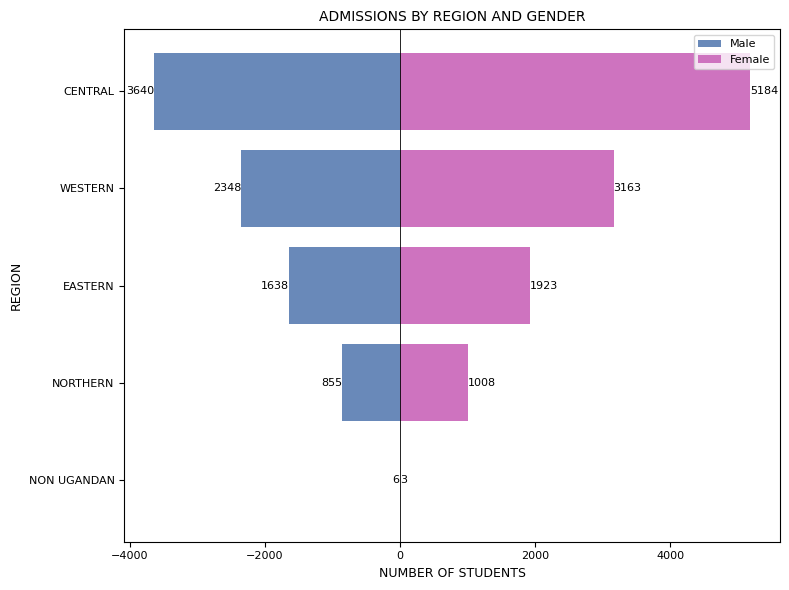

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Group data: count students per region and gender
region_gender_counts = df.groupby(['region', 'ge']).size().unstack(fill_value=0)

# Ensure consistent region order by total admissions
region_gender_counts = region_gender_counts.loc[region_gender_counts.sum(axis=1).sort_values().index]

# Male = negative (left), Female = positive (right)
male_counts = -region_gender_counts.get('M', pd.Series(0, index=region_gender_counts.index))
female_counts = region_gender_counts.get('F', pd.Series(0, index=region_gender_counts.index))
regions = region_gender_counts.index

# Plot: compact size
plt.figure(figsize=(8, 6))  # Smaller figure size

# Draw horizontal bars
plt.barh(regions, male_counts, color="#6989B9", label='Male')
plt.barh(regions, female_counts, color="#CE73BF", label='Female')

# Annotate values
for i, region in enumerate(regions):
    plt.text(male_counts[i] - 0.5, i, str(abs(male_counts[i])), va='center', ha='right', fontsize=8)
    plt.text(female_counts[i] + 0.5, i, str(female_counts[i]), va='center', ha='left', fontsize=8)

# Styling
plt.axvline(0, color='black', linewidth=0.6)
plt.title('ADMISSIONS BY REGION AND GENDER', fontsize=10)
plt.xlabel('NUMBER OF STUDENTS', fontsize=9)
plt.ylabel('REGION', fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=8, loc='upper right')
plt.tight_layout()
plt.savefig('visuals/compact_diverging(1)', dpi=300, bbox_inches='tight')
plt.show()


<Figure size 1200x800 with 0 Axes>

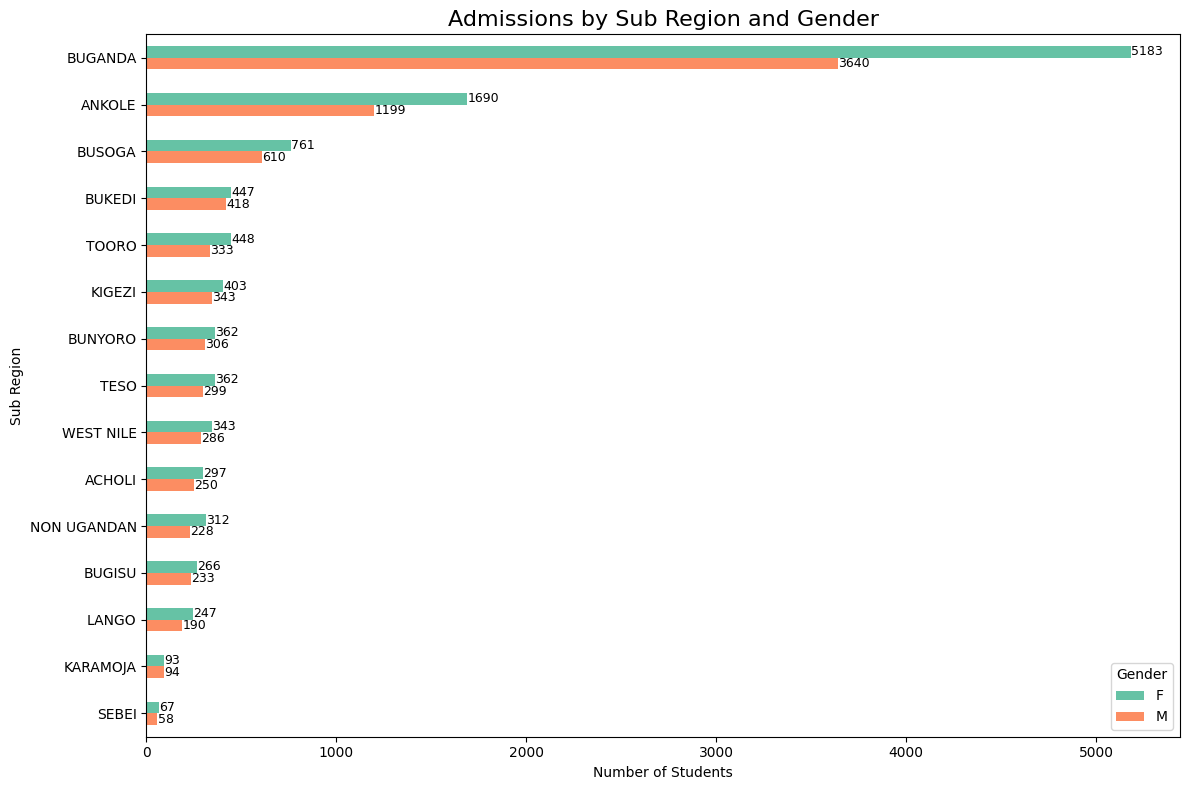

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Count students by sub_region and gender
sub_region_gender_counts = df.groupby(['sub_region', 'ge']).size().unstack(fill_value=0)

# Sort sub-regions by total admissions (descending)
sub_region_gender_counts['Total'] = sub_region_gender_counts.sum(axis=1)
sub_region_gender_counts = sub_region_gender_counts.sort_values(by='Total', ascending=False)
sub_region_gender_counts.drop(columns='Total', inplace=True)

# Plot settings
plt.figure(figsize=(12, 8))
colors = sns.color_palette("Set2")  # Better color palette

# Plot horizontal grouped bars
sub_region_gender_counts.plot(kind='barh', stacked=False, color=colors, figsize=(12, 8))

# Annotate counts on each bar
for index, row in sub_region_gender_counts.iterrows():
    for i, gender in enumerate(sub_region_gender_counts.columns):
        value = row[gender]
        if value > 0:
            plt.text(value + 1, sub_region_gender_counts.index.get_loc(index) + (i - 0.5) * 0.25,
                     str(value), va='center', fontsize=9)

# Chart formatting
plt.title('Admissions by Sub Region and Gender', fontsize=16)
plt.xlabel('Number of Students')
plt.ylabel('Sub Region')
plt.legend(title='Gender')
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()
plt.savefig('visuals/admissions(1).png', dpi=300, bbox_inches='tight')
plt.show()


In [22]:
print(df.columns)

Index(['no', 'formid', 'index_no', 'name', 'ge', 'uace_', 'dcode', 'dname',
       'course_code', 'course_name', 'tot_wt', 'program_name', 'stream',
       'cluster', 'region', 'sub_region'],
      dtype='object')


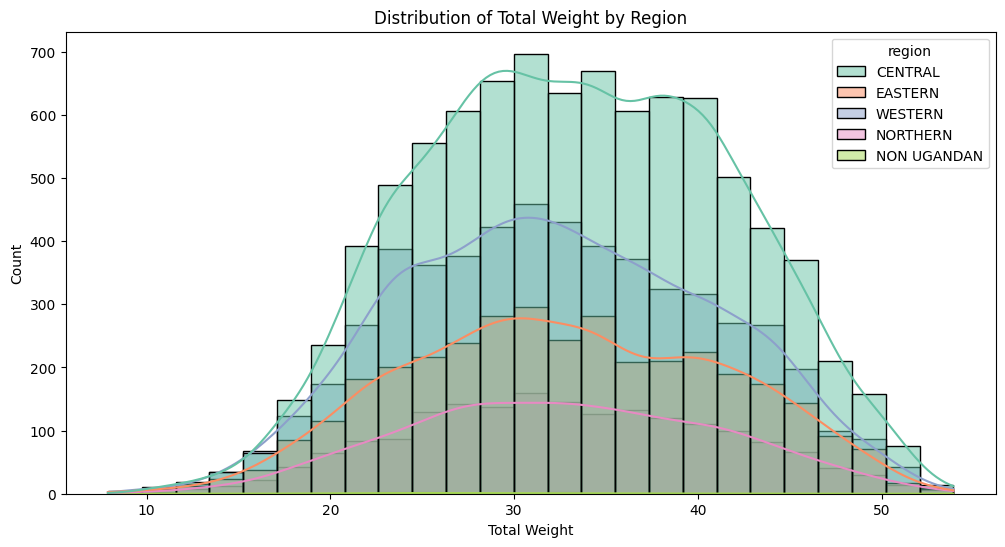

In [23]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='tot_wt', hue='region', kde=True, bins=25, palette='Set2')
plt.title('Distribution of Total Weight by Region')
plt.xlabel('Total Weight')
plt.ylabel('Count')
plt.savefig('visuals/weight(2).png', dpi=300, bbox_inches='tight')
plt.show()

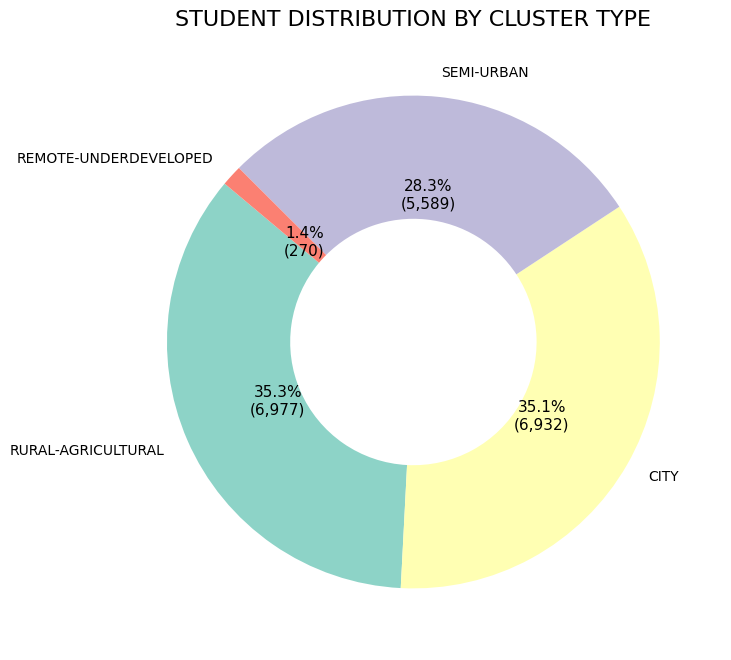

In [24]:
import matplotlib.pyplot as plt

# Prepare data
cluster_counts = df['cluster'].value_counts()
total = cluster_counts.sum()

# Custom autopct function to show percentage + count
def make_autopct(values):
    def my_autopct(pct):
        absolute = int(round(pct / 100. * sum(values)))
        return f"{pct:.1f}%\n({absolute:,})"
    return my_autopct

# Plot
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    cluster_counts,
    labels=cluster_counts.index,
    autopct=make_autopct(cluster_counts),
    startangle=140,
    colors=plt.get_cmap('Set3').colors[:len(cluster_counts)],
    wedgeprops=dict(width=0.5)  # donut style
)

# Style text
for text in autotexts:
    text.set_fontsize(11)
    text.set_color('black')

# Title and formatting
plt.title('STUDENT DISTRIBUTION BY CLUSTER TYPE', fontsize=16)
plt.ylabel('')  # Remove y-label
plt.savefig('visuals/clusters(3).png', dpi=300, bbox_inches='tight')
plt.show()


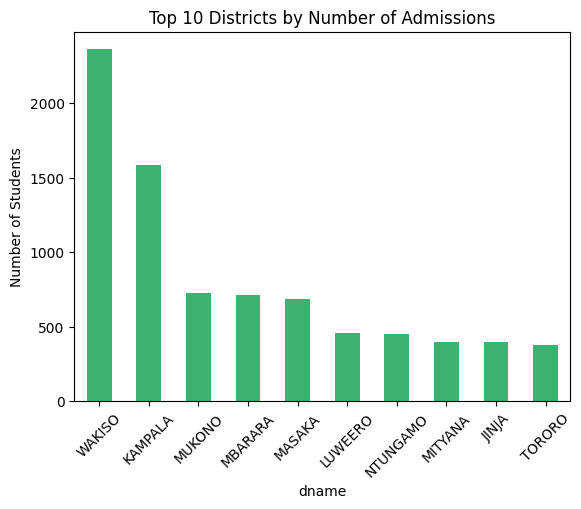

In [25]:
# Visualization 4: Top 10 Districts by Admissions
top_districts = df['dname'].value_counts().head(10)
top_districts.plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Districts by Number of Admissions')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.show()

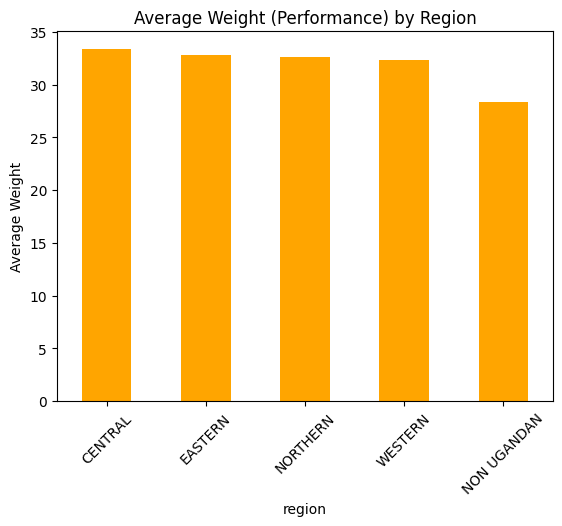

In [26]:
# Visualization 5: Average Weight by Region
avg_weight_region = df.groupby('region')['tot_wt'].mean().sort_values(ascending=False)
avg_weight_region.plot(kind='bar', color='orange')
plt.title('Average Weight (Performance) by Region')
plt.ylabel('Average Weight')
plt.xticks(rotation=45)
plt.show()

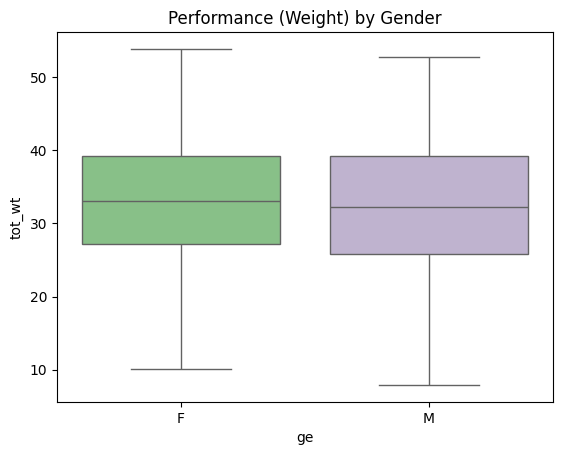

In [27]:
# Visualization 6: Performance by Gender
sns.boxplot(data=df, x='ge', y='tot_wt', palette='Accent')
plt.title('Performance (Weight) by Gender')
plt.show()

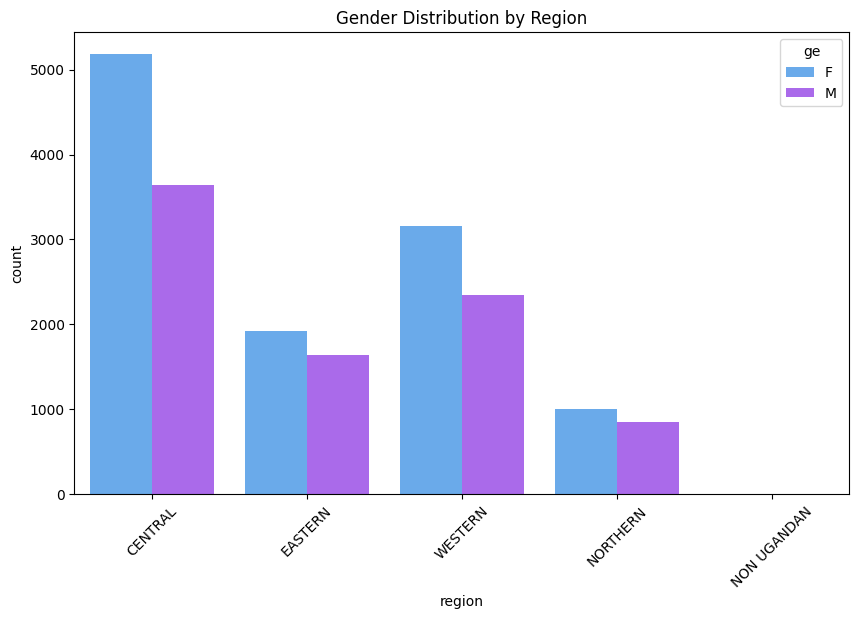

In [28]:
# Visualization 7: Gender Distribution by Region
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='region', hue='ge', palette='cool')
plt.title('Gender Distribution by Region')
plt.xticks(rotation=45)
plt.show()

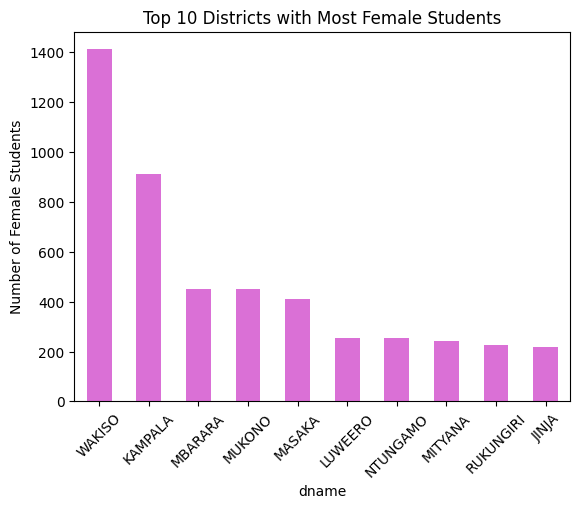

In [29]:
# Visualization 8: Top 10 Districts with Most Female Students
female_df = df[df['ge'] == 'F']
top_female = female_df['dname'].value_counts().head(10)
top_female.plot(kind='bar', color='orchid')
plt.title('Top 10 Districts with Most Female Students')
plt.ylabel('Number of Female Students')
plt.xticks(rotation=45)
plt.show()

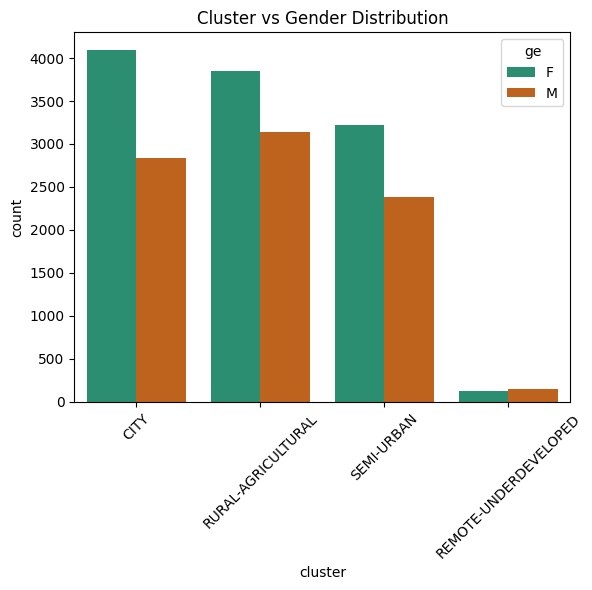

In [30]:
# Visualization 9: Cluster vs Gender
sns.countplot(data=df, x='cluster', hue='ge', palette='Dark2')
plt.title('Cluster vs Gender Distribution')
plt.xticks(rotation=45)
plt.show()

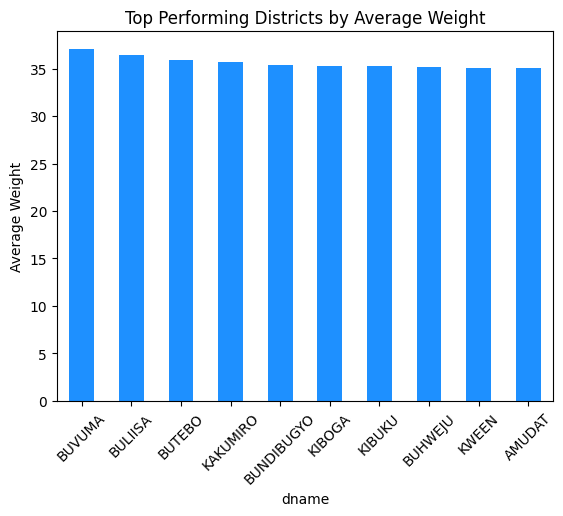

In [31]:
# Visualization 10: Top Performing Districts
top_perf = df.groupby('dname')['tot_wt'].mean().sort_values(ascending=False).head(10)
top_perf.plot(kind='bar', color='dodgerblue')
plt.title('Top Performing Districts by Average Weight')
plt.ylabel('Average Weight')
plt.xticks(rotation=45)
plt.show()

In [32]:
# Step 1: Identify all program sections in the sheet
# We'll detect rows where only one non-null cell exists and contains a program name
program_rows = df[df.notna().sum(axis=1) == 1]

In [33]:
# Preview detected program titles
program_titles = program_rows.iloc[:, 0].reset_index()
program_titles.columns = ['row_index', 'program_title']
program_titles.head(30)

,row_index,program_title


In [34]:
import pandas as pd

# Load the data
# df = pd.read_excel('cleaned_clustered_admissions(14).xlsx')  # Replace with your file path

# Define course to college mapping
course_college_map = {
    "CHS": ["BDS", "BDT", "BEH", "BLT", "BMR", "BOS", "BPT", "BYT", "MAM", "MLT", "NUR", "PHA", "BSL", 'SSM'],
    "LAW": ["LLB"], # Added LLB based on the initial dataset you provided
    "CEES": ["BEC", "BYW", "EDA", "EDB", "EDP", "EEC", 'SPS'],
    "COVAB": ["BJA", "BLB", "SCB", "SCP", "SCX", "VET"],
    "COBAMS": ["ACC", "ADA", "ADJ", "ADM", "AML", "BBA", "BBC", "BBD", "BBE", "BBJ", "BHE", "BHJ", "BHM", "BIB", "BIM", "BJB", "BJJ", "BJO", "BJS", "BKE", "BLC", "BLM", "BMA", "BML", "BMM", "BMS", "BNE", "BNM", "BOM", "BPL", "BQE", "BRJ", "BRM", "BRO", "BSA", "BSF", "BSU", "BTB", "BTH", "BTT", "CEA", "CMM", "COB", "COE", "COM", "CRJ", "CRO", "ECE", "ECN", "ECO", "HMA", "HML", "HNM", "HOM", "HSJ", "HSO", "JAA", "JBE", "JOA", "MTM", "PMA", "PML", "PMM", "PNM", "PSC", "PSM", "PSU", "SEC", "TLM", "TTM", "BPS", "BST", "BUS", "SAS", "STA"],
    "CoNAS": ["BBI", "BBP", "BBT", "BCB", "BIC", "SPS"],
    "COCIS": ["BIA", "BSI", "BSJ", "BSW", "CSC", "CSE", "CSJ", "IST", "JCA", "SSE"],
    "CAES": ["AGE", "AGM", "AGR", "BAI", "BEV", "BFS", "BGS", "BHD", "BIX", "BOF", "BUP", "BWE", "FST"],
    "CEDAT": ["ARC", "BFA", "BID", "BVC", "BVL", "CCE", "CIV", "ELE", "LSG", "MEC", "BPG", "SQS"],
    "CHUSS": ["APS", "APY", "ARS", "ASE", "ASS", "BAC", "BAP", "BCE", "BEN", "BEY", "BJC", "BJE", "BLE", "BLG", "DPA", "LGM", "LIS", "MUS"],
}

# Create reverse mapping
reverse_map = {course_code: college for college, codes in course_college_map.items() for course_code in codes}

# Map course_code to college
df['college'] = df['course_code'].map(reverse_map).fillna('Other')

# Save to new file
df.to_excel('visuals/cleaned_clustered_admissions(17).xlsx', index=False)
# print('Classification complete and file saved.')